<a href="https://colab.research.google.com/github/DQN-Labs/school-cheating-ai-using-cv/blob/main/school_Ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training

In [1]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Activation, Dropout, Flatten, Dense



2024-11-07 06:13:54.711843: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-07 06:13:55.608471: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-07 06:13:56.191183: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-07 06:13:56.801517: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-07 06:13:57.151283: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-07 06:13:58.298643: I tensorflow/core/platform/cpu_feature_gu

In [2]:
#conv layers
model = Sequential()

model.add(Conv2D(64,(3,3),input_shape = (150,150,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))




/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
#fully connected layers
model.add(Flatten())

model.add(Dense( activation = 'relu', units=64))
model.add(Dense( activation = 'softmax', units=2))



In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,183,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,259,586 (4.80 MB)

 Trainable params: 1,259,586 (4.80 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [7]:

train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
train_set = train_datagen.flow_from_directory(
        'new_data',
        target_size=(150, 150),
        class_mode='categorical')

Found 271 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(
        'new_data',
        target_size=(150, 150),
        class_mode='categorical')

In [ ]:
model.fit(train_set,epochs=50,validation_data=test_set)


In [9]:
model.save("version_0-5.keras")

In [11]:
import keras
keras.saving.load_model("version_0-5.keras")

<Sequential name=sequential, built=True>

# Interpretation

2024-11-11 08:09:29.847812: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-11 08:09:30.159422: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-11 08:09:30.277146: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-11 08:09:30.404636: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-11 08:09:30.441918: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-11 08:09:30.683893: I tensorflow/core/platform/cpu_feature_gu

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
CHEATER DETECTED!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
CHEATER DETECTED!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
CHEATER DETECTED!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


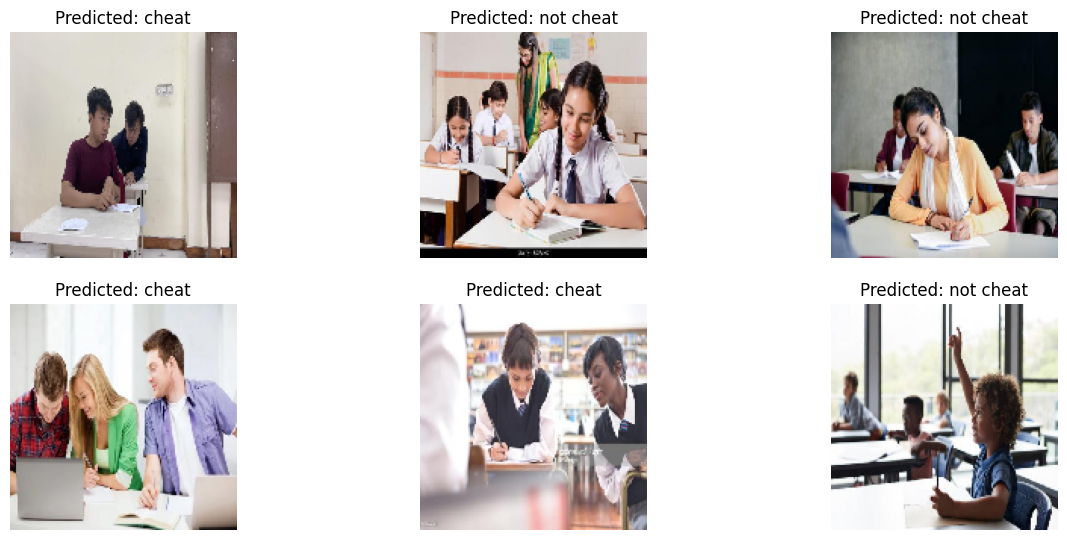

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import keras



model = keras.saving.load_model('version_0-5.keras')


class_indices = {
    0: 'cheat',
    1: 'not cheat'
}

# Function to visualize predictions
def visualize_predictions(image_paths):
    plt.figure(figsize=(15, 10))
    for i, img_path in enumerate(image_paths):
        test_image = image.load_img(img_path, target_size=(150, 150))
        test_image = image.img_to_array(test_image) / 255.0  
        test_image = np.expand_dims(test_image, axis=0)

        result = model.predict(test_image)
        predicted_index = np.argmax(result)
        if predicted_index == 0:
            print("CHEATER DETECTED!")
        
        plt.subplot(3, 3, i + 1)  
        plt.imshow(test_image[0])
        plt.title(f'Predicted: {class_indices[predicted_index]}')
        plt.axis('off')
    plt.show()


image_paths = [
'/workspaces/school-cheating-ai-using-cv/new_data/cheat/IMG_6501_jpg.rf.95b7d78d16caadab6ba0c892b74b4de7.jpg',
'/workspaces/school-cheating-ai-using-cv/new_data/not_cheat/good952_jpg.rf.7f9e068864a45a3d80e84f009fa4df60.jpg',
'/workspaces/school-cheating-ai-using-cv/new_data/not_cheat/good754_jpg.rf.fc9c8ae4ec86d4570f57a40f0c569ea9.jpg',
'/workspaces/school-cheating-ai-using-cv/new_data/cheat/cheat683_jpg.rf.deb1dd2b6a8d27a6659fdef37f5e6263.jpg',
'/workspaces/school-cheating-ai-using-cv/new_data/cheat/cheat193_jpg.rf.9bf937c0481b5d0aa192730dd1f601d1.jpg',
'/workspaces/school-cheating-ai-using-cv/new_data/not_cheat/good757_jpg.rf.fd22ef5191896bcdc54158c2b33525bc.jpg',


]

visualize_predictions(image_paths)

